In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Times New Roman"

In [5]:
debrief = pd.read_excel("../data/debrief_responses.xlsx")

# Drop columns gt_us_1 - gt_us_5 by column name
debrief = debrief.drop(columns=debrief.columns[debrief.columns.str.contains('gt_us_')])
debrief = debrief.drop(columns=debrief.columns[debrief.columns.str.contains('gt_vietnam')])
debrief = debrief.drop(columns=debrief.columns[debrief.columns.str.contains('pilot')])

ai_pathology_present = debrief.iloc[0, 1:].to_list()
ai_treatment = debrief.iloc[1, 1:].to_list()
ai_effort = debrief.iloc[2, 1:].to_list()

# Delete nan from lists
ai_pathology_present = [x for x in ai_pathology_present if str(x) != 'nan']
ai_treatment = [x for x in ai_treatment if str(x) != 'nan']
ai_effort = [x for x in ai_effort if str(x) != 'nan']

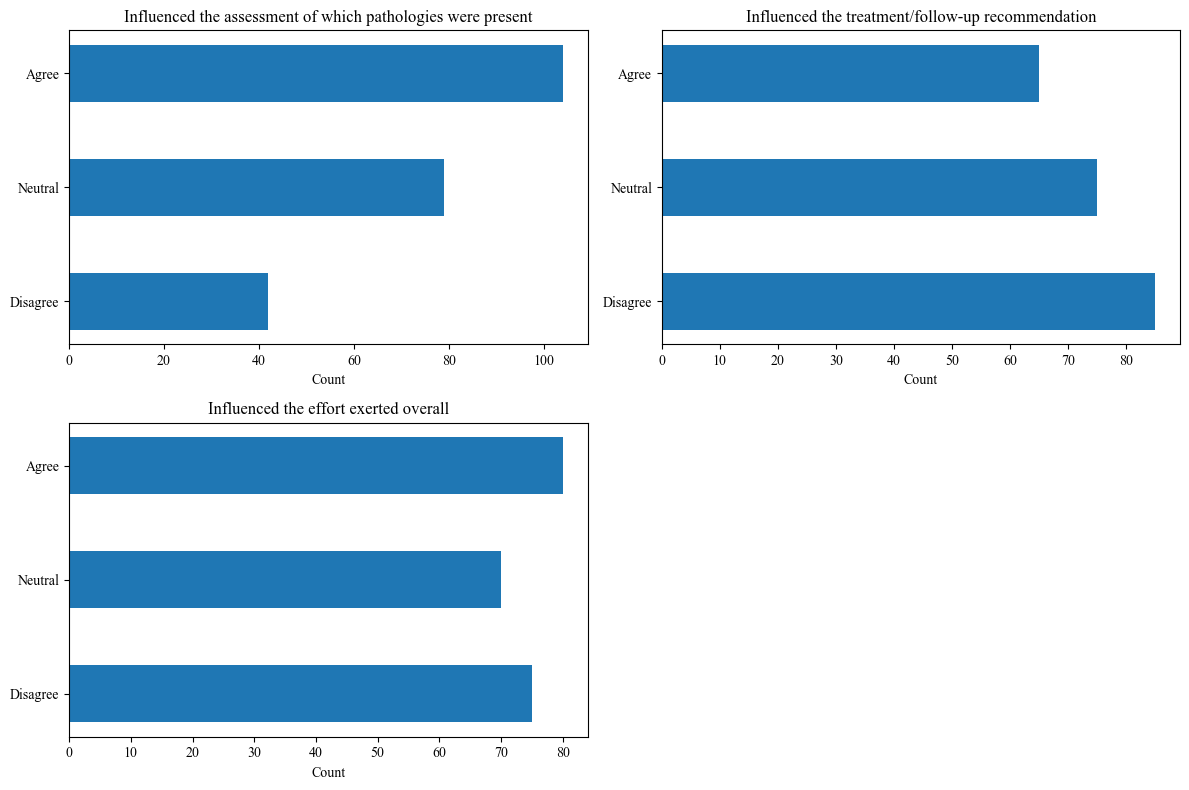

In [6]:
def plot_bar(ax, data, title, order=["Agree", "Neutral", "Disagree"]):
    # Convert "Strongly Agree" and "Strongly Disagree"
    data = ['Agree' if x in ["Strongly Agree", "Agree"] else 'Disagree' if x in ["Strongly Disagree", "Disagree"] else x for x in data]
    
    # Count occurrences
    counts = {label: data.count(label) for label in order}
    
    # Plot using specified order on the given Axes
    ax.barh(list(counts.keys()), list(counts.values()), height=0.5)
    ax.set_title(title)
    ax.invert_yaxis()
    ax.set_xlabel("Count")


# Create figure and axes for a 2x2 grid, we'll use 3 of the 4 plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 

# Plot the first two plots in the first row
plot_bar(axs[0, 0], ai_pathology_present, "Influenced the assessment of which pathologies were present")
plot_bar(axs[0, 1], ai_treatment, "Influenced the treatment/follow-up recommendation")

# Use the first cell of the second row for the third plot
plot_bar(axs[1, 0], ai_effort, "Influenced the effort exerted overall")

# OHide the unused fourth subplot
fig.delaxes(axs[1, 1])

fig.tight_layout()
plt.show()
fig.savefig("../../output/figures/ai_influence_combined.png")

Clinical history

225


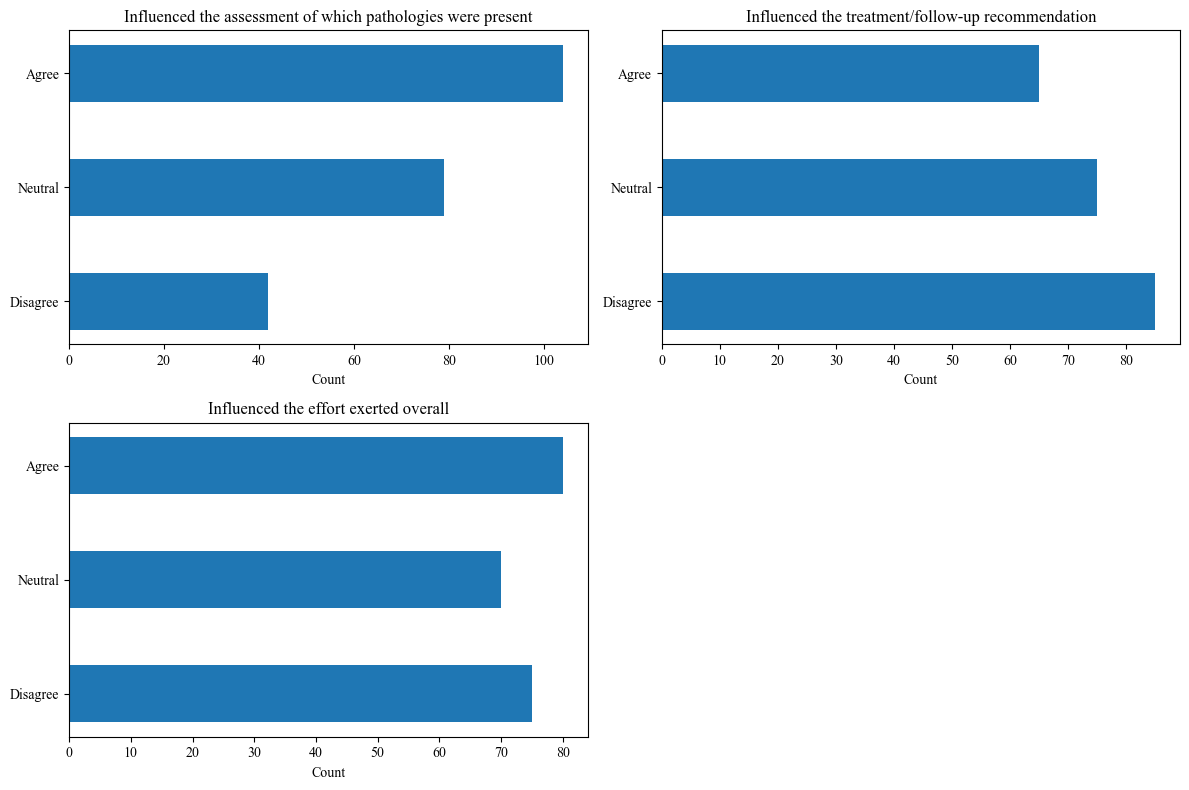

In [7]:
ph_pathology_present = debrief.iloc[3, 1:].to_list()
ph_treatment = debrief.iloc[4, 1:].to_list()
ph_effort = debrief.iloc[5, 1:].to_list()

# Delete nan from lists
ph_pathology_present = [x for x in ai_pathology_present if str(x) != 'nan']
ph_treatment = [x for x in ai_treatment if str(x) != 'nan']
ph_effort = [x for x in ai_effort if str(x) != 'nan']

print(len(ph_pathology_present))

fig, axs = plt.subplots(2, 2, figsize=(12, 8)) 

# Plot the first two plots in the first row
plot_bar(axs[0, 0], ph_pathology_present, "Influenced the assessment of which pathologies were present")
plot_bar(axs[0, 1], ph_treatment, "Influenced the treatment/follow-up recommendation")

# Use the first cell of the second row for the third plot
plot_bar(axs[1, 0], ph_effort, "Influenced the effort exerted overall")

# Hide the unused fourth subplot
fig.delaxes(axs[1, 1])


fig.tight_layout()
plt.show()
fig.savefig('../../output/figures/ph_influence_combined.pdf')    
